Goal

Our objective is to predict  which classification model gives the best result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model analysis functions
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import classification_report

In [2]:
ac_list = []
model_names = []

In [3]:
data=pd.read_excel(r'C:\Users\USER\Desktop\iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

In [6]:
data["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [7]:
data.isnull().sum()  # checking for null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

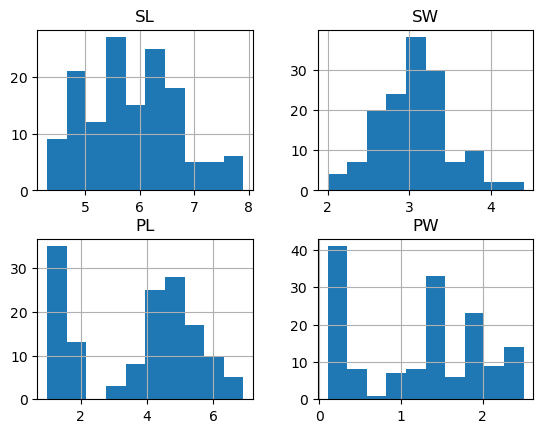

In [8]:
data.hist()
plt.show()

In [9]:
for i in ['SL', 'SW', 'PL', 'PW']:
  data[i]=data[i].fillna(data[i].median())    # replacing null value with the help of median since its skwed 

In [10]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [13]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


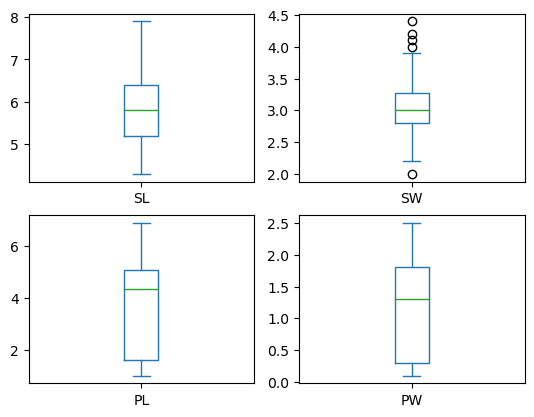

In [14]:
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

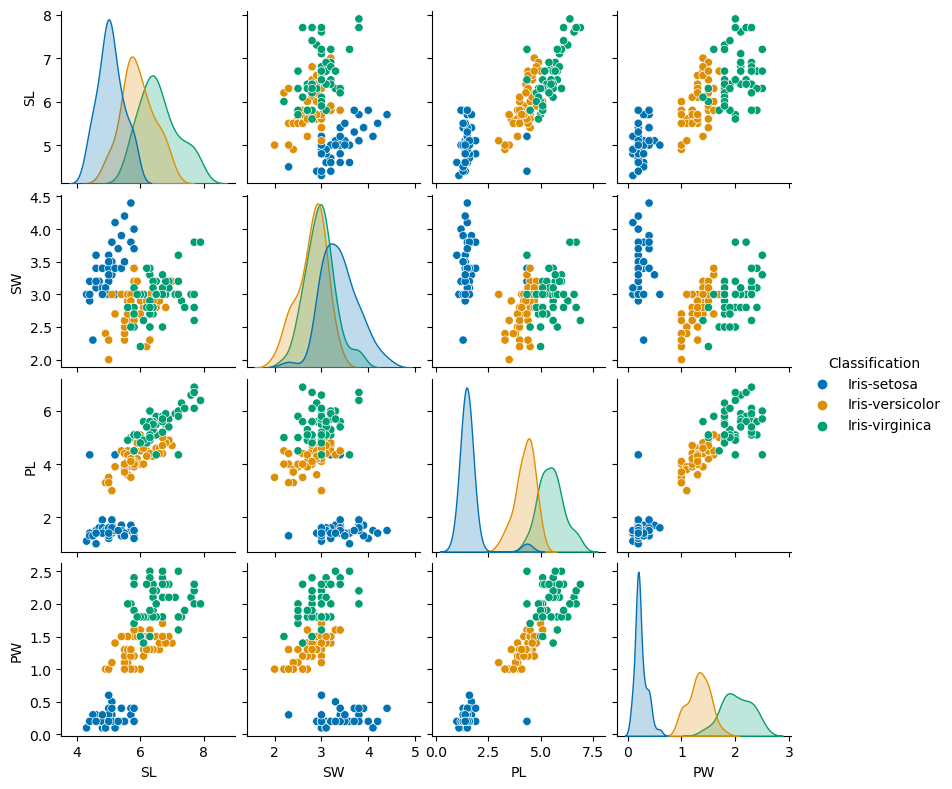

In [15]:
sns.pairplot(data, hue="Classification", height = 2, palette = 'colorblind')
plt.show()
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations

<AxesSubplot:>

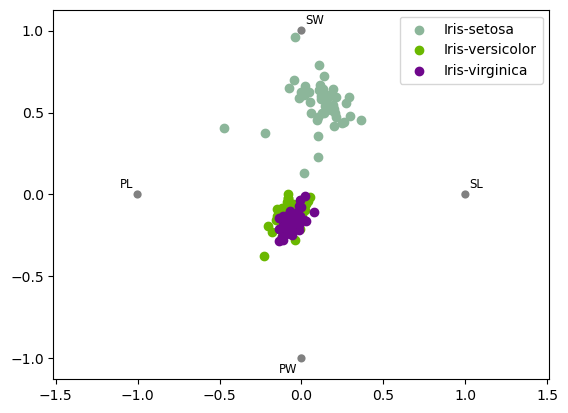

In [16]:
from pandas.plotting import radviz
pd.plotting.radviz(data, "Classification")
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature

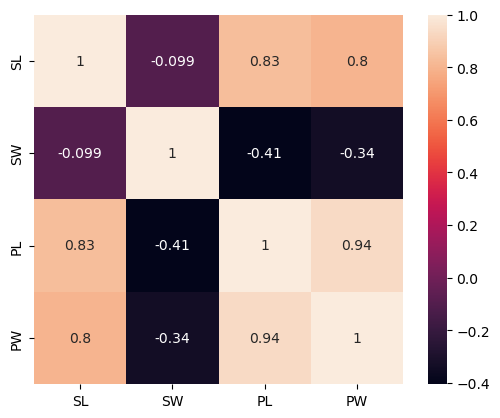

In [17]:
corrmat = data.corr()
sns.heatmap(corrmat, annot = True, square = True)
plt.show()

# label encoding

In [18]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data['Classification'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
#X=data.iloc[:,:4]
#y=data.iloc[:,4]

In [21]:
y=data['Classification']
X=data.drop('Classification',axis=1)


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42) # split it to train and test set 

# StandardScaler 


In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

display(pd.DataFrame(X_train).head(),pd.DataFrame(X_test).head())

,0,1,2,3
0,-1.077644,1.359551,-1.423229,-1.358652
1,-0.826717,2.554760,-1.364235,-1.492722
2,-0.073934,-0.791826,0.759547,0.920532
3,-0.073934,0.881467,0.405583,0.518323
4,1.055240,0.164341,0.523571,0.384253


,0,1,2,3
0,0.316633,-0.695773,0.563766,0.055859
1,-0.164649,1.664885,-1.101242,-1.067895
2,2.241764,-1.167905,1.784771,1.429337
3,0.196313,-0.459707,0.452765,0.430444
4,1.158878,-0.695773,0.619266,0.305582


In [24]:
pd.DataFrame( y_test.value_counts() )

,Classification
Iris-setosa,15
Iris-virginica,12
Iris-versicolor,11


# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial',solver='lbfgs', random_state=42,max_iter=1000) # create an instance 
model=lr.fit(X_train,y_train)# create the model
y_pred=model.predict(X_test)  # preditction


In [26]:
confusion_matrix(y_test,y_pred)


array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)


0.9736842105263158

In [28]:
MR_ac=accuracy_score(y_test,y_pred)
ac_list.append(MR_ac)
model_names.append('MLR')

In [29]:
precision_score(y_test,y_pred,average="weighted")

0.9757085020242916

In [30]:
recall_score(y_test,y_pred,average="weighted")

0.9736842105263158

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [32]:
MR_pred_df = pd.DataFrame(pd.Series(y_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), MR_pred_df], axis=1)

,Classification,Test Outcome
Iris-setosa,15,15
Iris-virginica,12,13
Iris-versicolor,11,10


# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]    #empty list
neighbors=np.arange(3,15)# taking valuse for 3 to 14 to the variable 

for k in neighbors:   # creating  a loop k (3 to 14)
    # create knn model  where k is 3 first till it is 14 
    knn=KNeighborsClassifier(n_neighbors=k)    # create an instance 
    model1=knn.fit(X_train,y_train)    # create the model
    y_pred_knn=model1.predict(X_test)   # preditction
    acc=accuracy_score(y_test,y_pred_knn)  # accurary
    metric_k.append(acc)   # append accuray to list 
 # check which valuse of k will give highest accuarcy

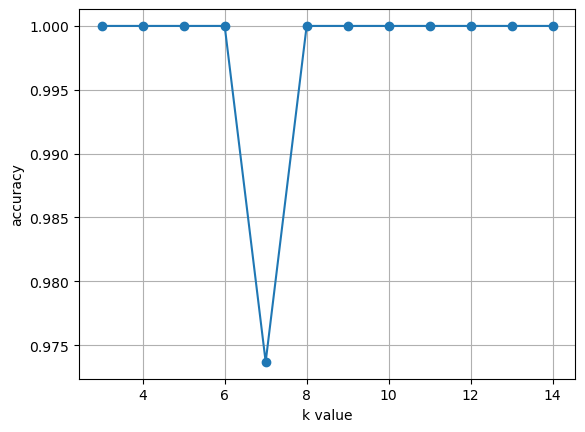

In [34]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()# k value is more for 7 so

In [35]:
knn=KNeighborsClassifier(n_neighbors=10)
model1=knn.fit(X_train,y_train)
y_pred_knn=model1.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred_knn)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred_knn)

1.0

In [38]:
KNN_ac = accuracy_score(y_test, y_pred_knn)
ac_list.append(KNN_ac)
model_names.append('KNN')

In [39]:
precision_score(y_test,y_pred_knn,average="weighted")

1.0

In [40]:
recall_score(y_test,y_pred_knn,average="weighted")

1.0

In [41]:
KNN_pred_df = pd.DataFrame(pd.Series(y_pred_knn).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), KNN_pred_df], axis=1)

,Classification,Test Outcome
Iris-setosa,15,15
Iris-virginica,12,12
Iris-versicolor,11,11


In [42]:
print(classification_report(y_test, y_pred_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



# SVM MODEL

# SVC (with rbf kernel) 

In [43]:
from sklearn.svm import SVC

In [44]:
svm_clf=SVC(kernel='rbf')

In [45]:
svm_model=svm_clf.fit(X_train,y_train)

In [46]:
y_pred1=svm_clf.predict(X_test)

In [47]:
confusion_matrix(y_test,y_pred1)  

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [48]:
accuracy_score(y_test,y_pred1)

0.9736842105263158

In [49]:
SVC_rbf_ac = accuracy_score(y_test, y_pred1)
ac_list.append(SVC_rbf_ac)
model_names.append('SVC_rbf_ac')

In [50]:
precision_score(y_test,y_pred1,average="weighted")

0.9757085020242916

In [51]:
recall_score(y_test,y_pred1,average="weighted")

0.9736842105263158

In [52]:
print(classification_report(y_test, y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [53]:
SVC_pred_df = pd.DataFrame(pd.Series(y_pred1).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),SVC_pred_df], axis=1)

,Classification,Test Outcome
Iris-setosa,15,15
Iris-virginica,12,13
Iris-versicolor,11,10


# SVC (with linear kernel) 

In [54]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(X_train,y_train)
y_pred2=svm_clf.predict(X_test)

In [55]:
confusion_matrix(y_test,y_pred2)  

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [56]:
accuracy_score(y_test,y_pred2) 

0.9736842105263158

In [57]:
SVC_linear_ac = accuracy_score(y_test, y_pred2)
ac_list.append(SVC_linear_ac)
model_names.append('SVC_linear_ac')

In [58]:
precision_score(y_test,y_pred2,average="weighted")

0.9757085020242916

In [59]:
recall_score(y_test,y_pred2,average="weighted")

0.9736842105263158

In [60]:
print(classification_report(y_test, y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [61]:
svc_pred_df = pd.DataFrame(pd.Series(y_pred2).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),svc_pred_df], axis=1)

,Classification,Test Outcome
Iris-setosa,15,15
Iris-virginica,12,13
Iris-versicolor,11,10


# SVC (with poly kernel) 

In [62]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='poly', degree=8)
svm_model=svm_clf.fit(X_train,y_train)
y_pred3=svm_clf.predict(X_test)

In [63]:
confusion_matrix(y_test,y_pred3)  

array([[ 6,  2,  7],
       [ 0, 10,  1],
       [ 2,  5,  5]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred3) 

0.5526315789473685

In [65]:
SVC_poly_ac = accuracy_score(y_test, y_pred3)
ac_list.append(SVC_poly_ac)
model_names.append('SVC_poly_ac')

In [66]:
precision_score(y_test,y_pred3,average="weighted")

0.5877887592283877

In [67]:
 recall_score(y_test,y_pred3 ,average="weighted")     

0.5526315789473685

In [68]:
print(classification_report(y_test, y_pred3))

                 precision    recall  f1-score   support

    Iris-setosa       0.75      0.40      0.52        15
Iris-versicolor       0.59      0.91      0.71        11
 Iris-virginica       0.38      0.42      0.40        12

       accuracy                           0.55        38
      macro avg       0.57      0.58      0.55        38
   weighted avg       0.59      0.55      0.54        38



In [69]:
sv_pred_df = pd.DataFrame(pd.Series(y_pred3).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),sv_pred_df], axis=1)

,Classification,Test Outcome
Iris-setosa,15,8
Iris-virginica,12,13
Iris-versicolor,11,17


# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
DT_pred=dt_clf.predict(X_test)

In [71]:
confusion_matrix(y_test,DT_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [72]:
accuracy_score(y_test,DT_pred)

1.0

In [73]:
DT_ac = accuracy_score(y_test, DT_pred)
ac_list.append(DT_ac)
model_names.append('DT')

In [74]:

precision_score(y_test,DT_pred,average="weighted")

1.0

In [75]:
 recall_score(y_test,DT_pred ,average="weighted")

1.0

In [76]:
print(classification_report(y_test, DT_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [77]:
DT_pred_df = pd.DataFrame(pd.Series(DT_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),DT_pred_df], axis=1)

,Classification,Test Outcome
Iris-setosa,15,15
Iris-virginica,12,12
Iris-versicolor,11,11


# Random forest algorithm

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)
RFA_pred=rf_clf.predict(X_test)

In [79]:
confusion_matrix(y_test,RFA_pred)  

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [80]:
accuracy_score(y_test,RFA_pred)

1.0

In [81]:
RFA_ac = accuracy_score(y_test, RFA_pred)
ac_list.append(RFA_ac)
model_names.append('RFA')

In [82]:
precision_score(y_test,RFA_pred,average="weighted")

1.0

In [83]:
 recall_score(y_test,RFA_pred ,average="weighted")

1.0

In [84]:
print(classification_report(y_test, RFA_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [85]:
RFA_pred_df = pd.DataFrame(pd.Series(RFA_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(),RFA_pred_df], axis=1)

,Classification,Test Outcome
Iris-setosa,15,15
Iris-virginica,12,12
Iris-versicolor,11,11


# Comparing Models

In [86]:
model_ac = pd.DataFrame(dict(zip(model_names, ac_list)), index=['model_names']).T

In [87]:
model_ac.rename(columns={'model_names': 'Accuracy'}, inplace=True)

In [88]:
round(model_ac*100, 2)

,Accuracy
MLR,97.37
KNN,100.00
SVC_rbf_ac,97.37
SVC_linear_ac,97.37
SVC_poly_ac,55.26
DT,100.00
RFA,100.00


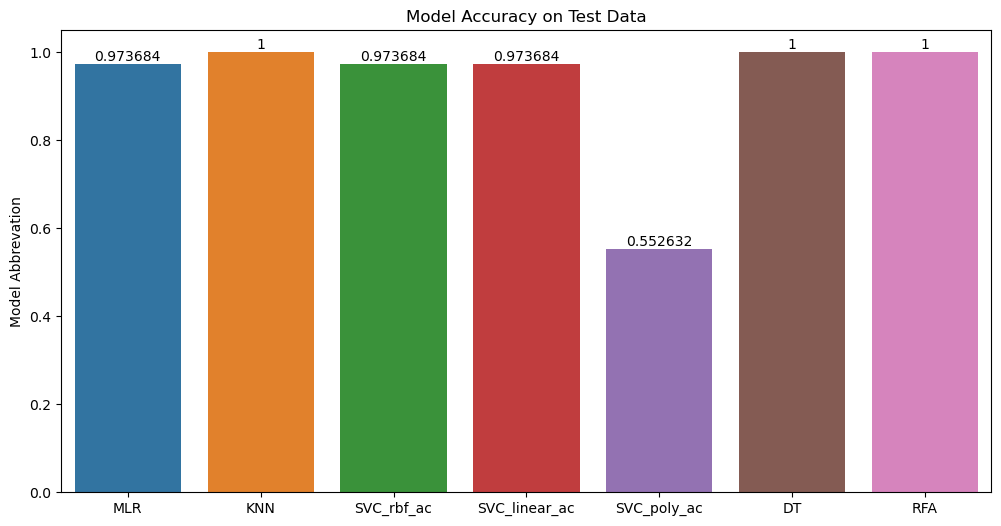

In [89]:
plt.figure(figsize=(12,6))
ax=sns.barplot(y='Accuracy', x=model_ac.index, data=model_ac)
ax.bar_label(ax.containers[0])
plt.title('Model Accuracy on Test Data')
plt.ylabel('Model Abbrevation')
plt.show()

After performing all classifications, we can conclude that KNN, Decision tree, and Random forest algorithms have 100% accuracy, while SVM model with poly kernel has the lowest accuracy of 55%.